# Breast Cancer Cytology

This notebook denibstates a logistic regression pipeline to classify fine-needle aspirate (FNA) breast-cancer data (malignant vs. benign) using the UCI Breast Cancer Wisconsin (Diagnostic) dataset.
It covers data loading, exploratory data analysis, model training, evaluation, and feature importnce visualization.

## Imports

In [1]:
import sys
import pandas as pd
import seaborn as sns
from src.data_utils import load_data, split_data
from src.modeling import train_model, evaluate_model, get_coefficients, sort_coeffcients_abs
from src.viz import plot_heatmap, plot_feature_importance, plot_pairplot

sys.path.append("../src")

## Load & split data

In [2]:
df = load_data()
x_train, x_test, y_train, y_test = split_data(df, test_size=0.2, random_state=33)

print(f"Training samples: {x_train.shape[0]}, Test samples: {x_test.shape[0]}")
df.head

Training samples: 455, Test samples: 114


<bound method NDFrame.head of      mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean conca

## Exploratory Data Analysis

### Heatmap

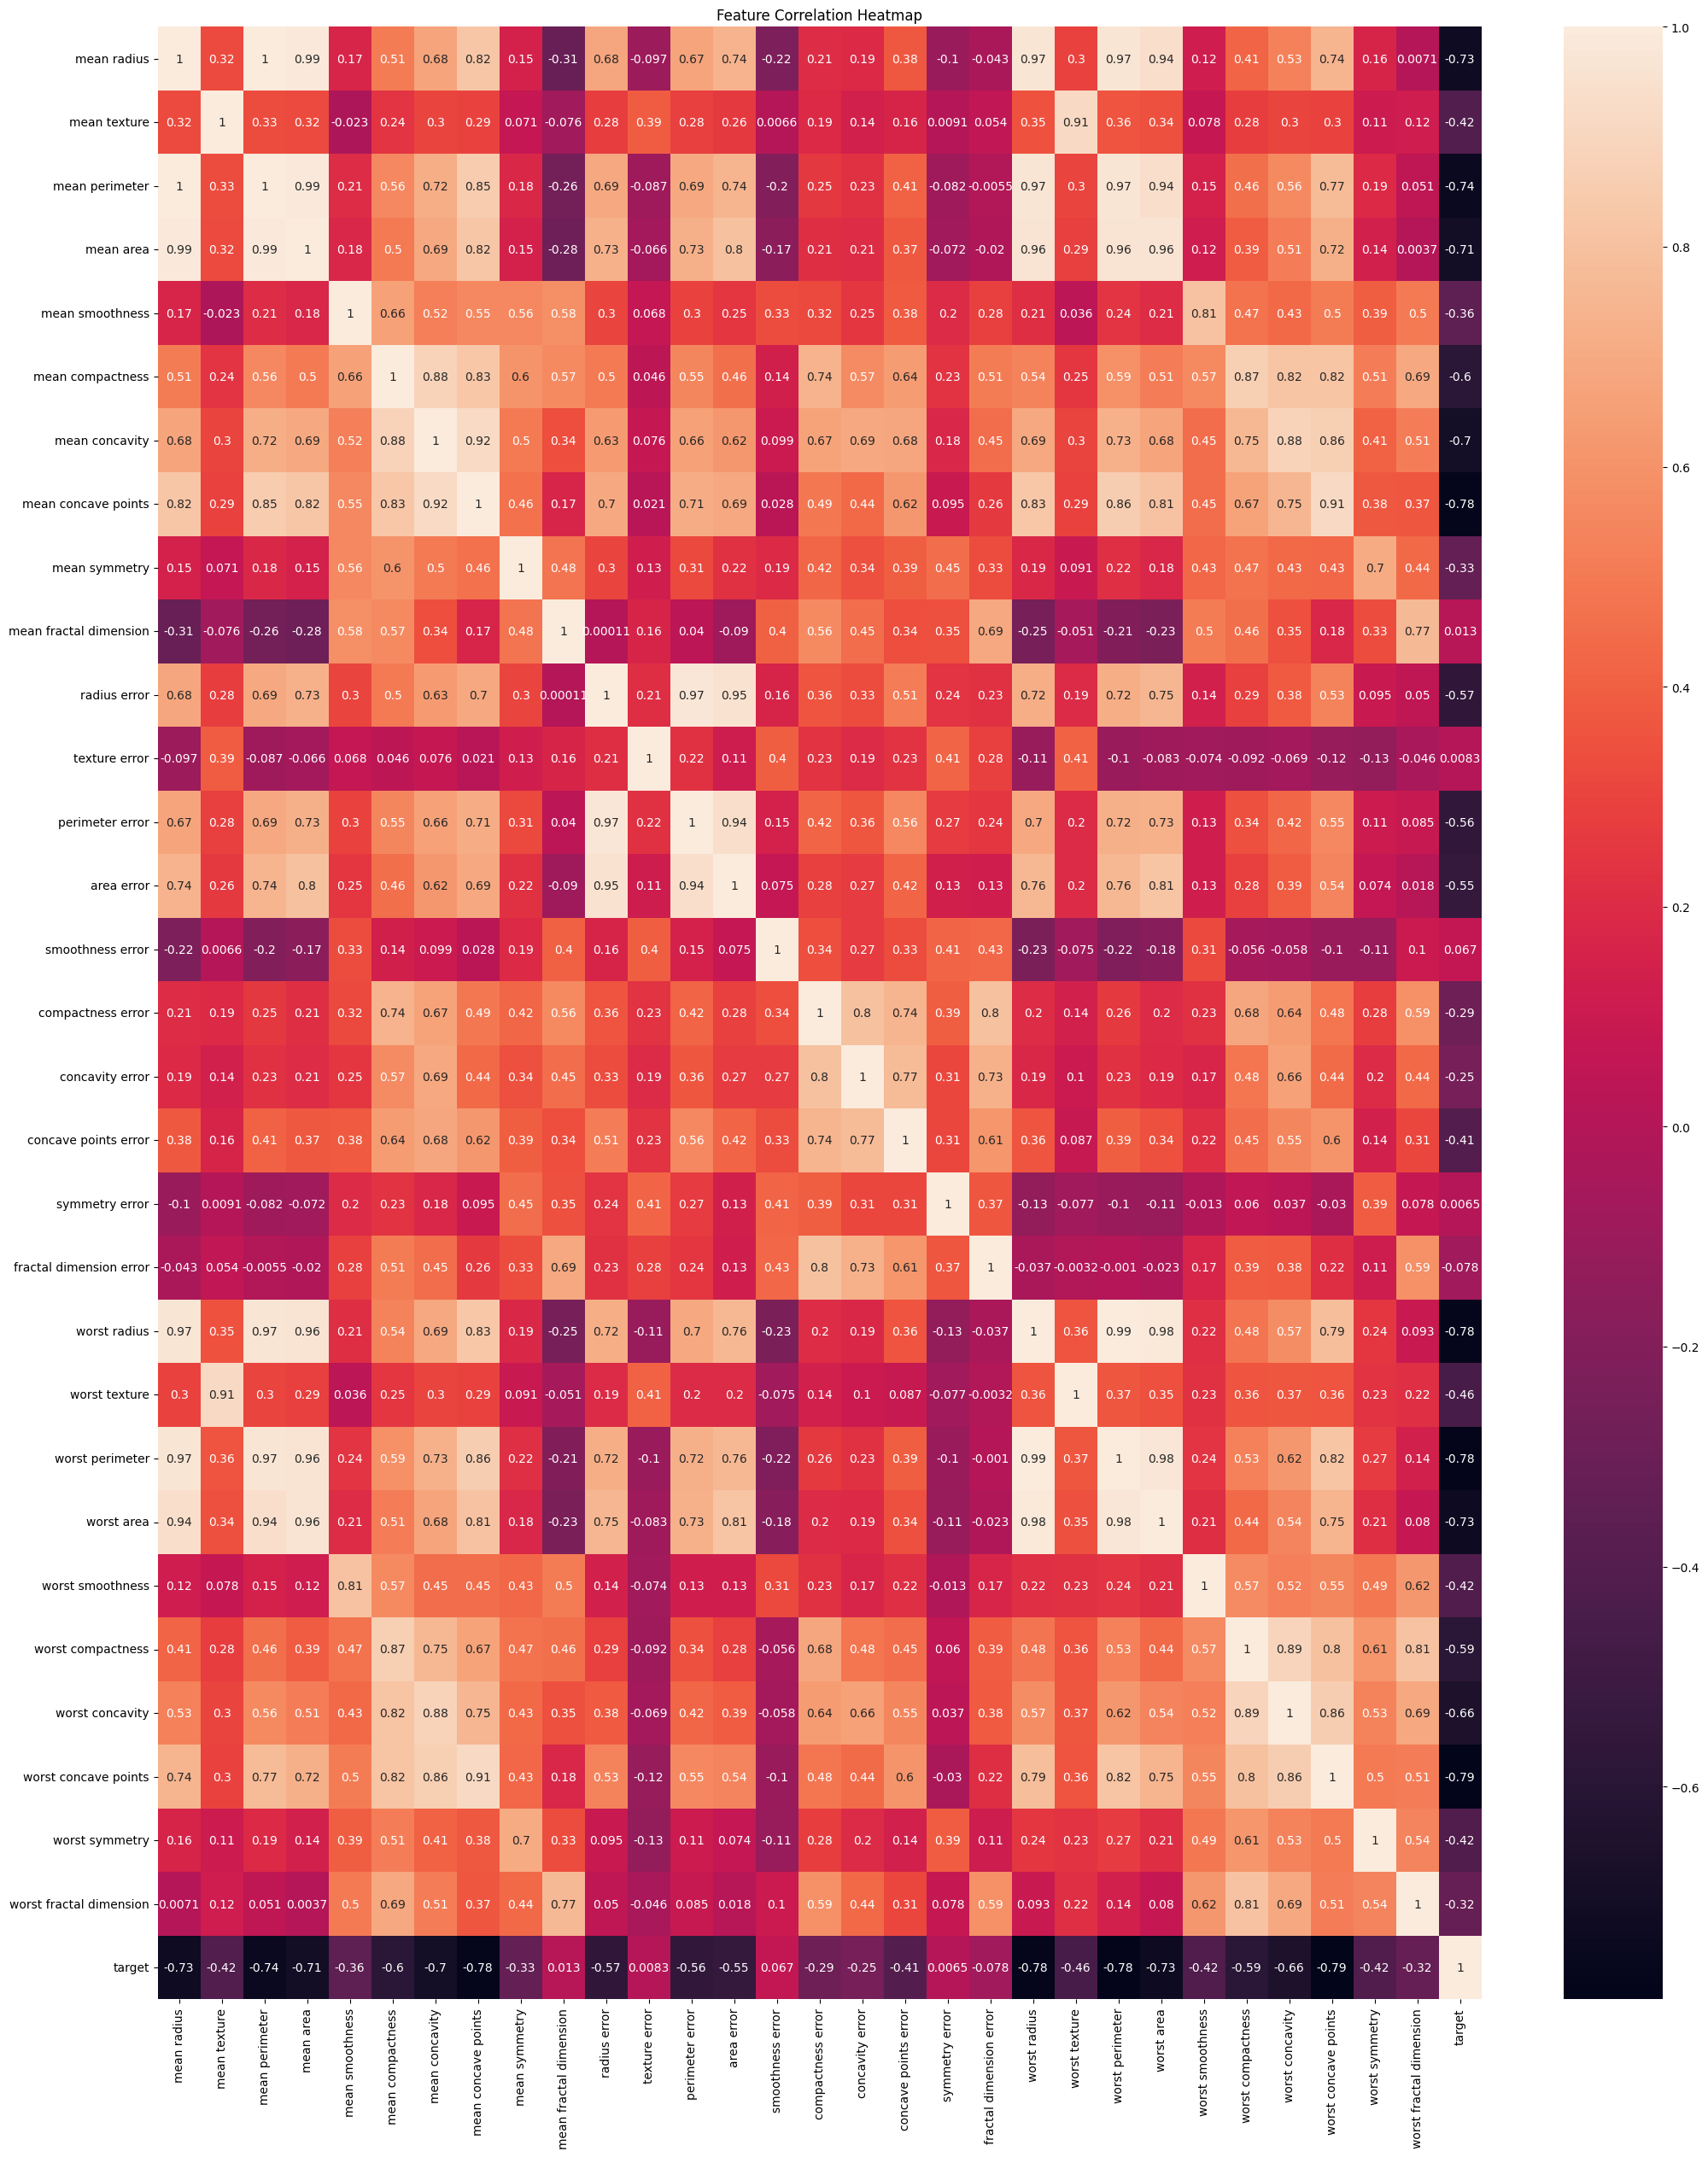

In [3]:
fig = plot_heatmap(df)
fig.savefig('../results/heatmap.png', dpi=300)


### Pairplot

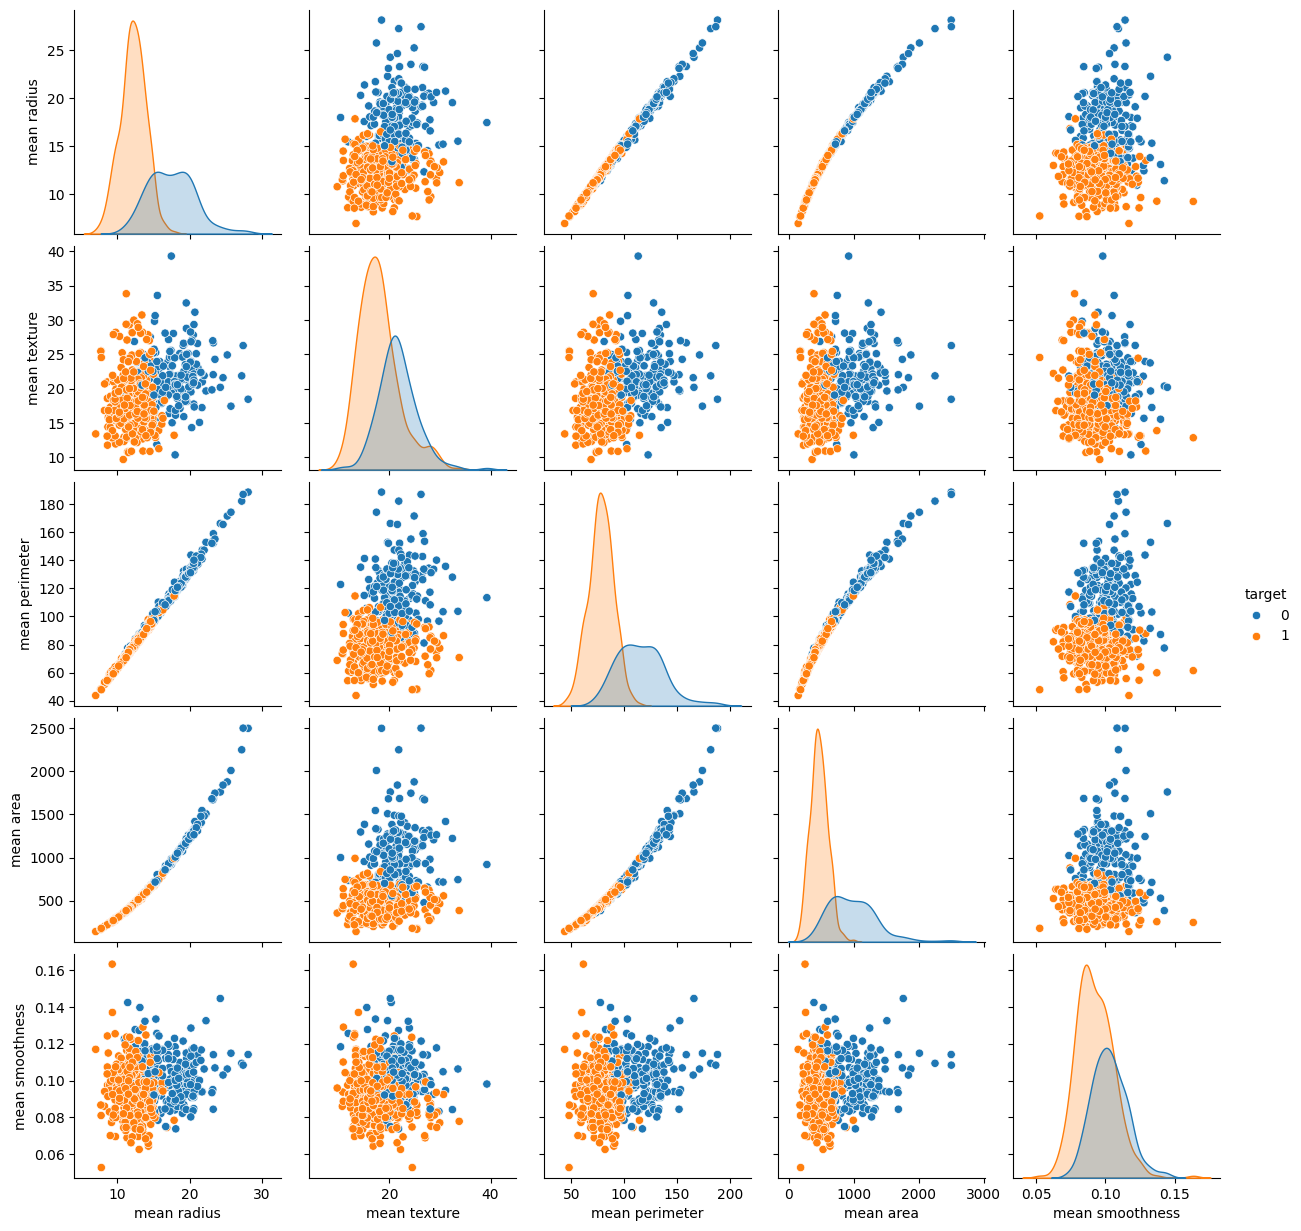

In [4]:
features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness']
fig = sns.pairplot(df, vars=features, hue='target')
fig.savefig('../results/pairplot.png', dpi=300)

## Model Training & Evaluation

In [5]:
#train
model = train_model(x_train, y_train, solver='liblinear')

#evaluate
cm, report = evaluate_model(model,x_test, y_test)

#print
print(f"Confution Matrix:\n", cm)
print(pd.DataFrame(report).T)

Confution Matrix:
 [[38  5]
 [ 1 70]]
              precision    recall  f1-score     support
0              0.974359  0.883721  0.926829   43.000000
1              0.933333  0.985915  0.958904   71.000000
accuracy       0.947368  0.947368  0.947368    0.947368
macro avg      0.953846  0.934818  0.942867  114.000000
weighted avg   0.948808  0.947368  0.946806  114.000000


## Feature Importance

Identifying which features are most important to model

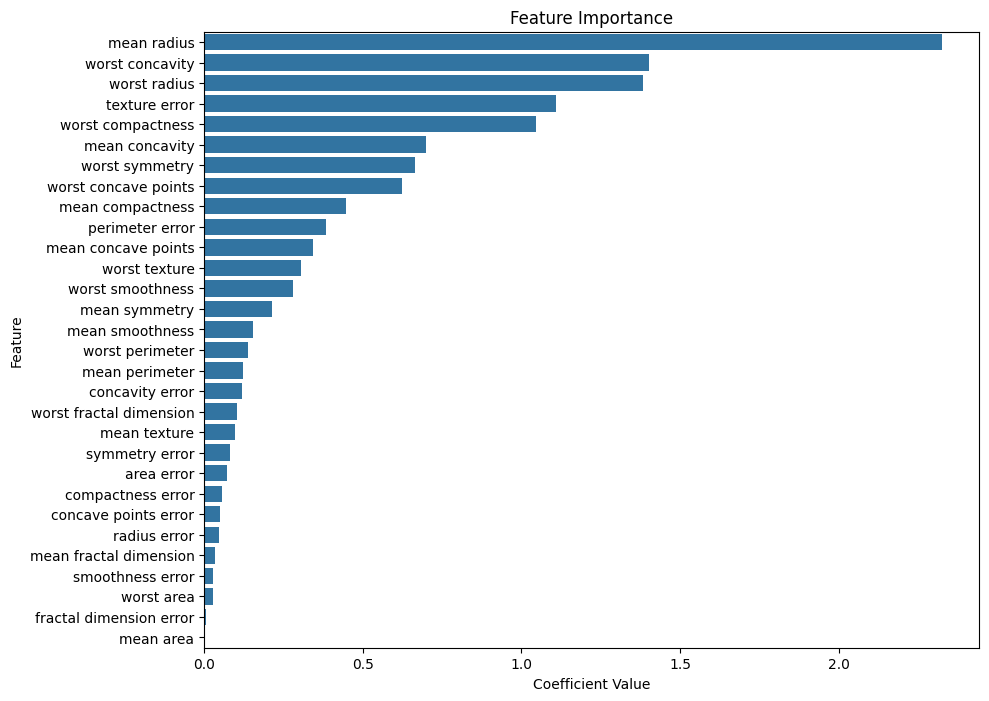

In [7]:
#extraction
coefs = get_coefficients(model, x_train.columns.tolist())
sorted_coefs = sort_coeffcients_abs(coefs)

#plot & save

fig = plot_feature_importance(sorted_coefs)
fig.savefig('../results/feature_importance.png', dpi=300)
